In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
import json
import ast
import seaborn as sns
import string
import matplotlib.pyplot as plt
pd.set_option("display.max_rows",101)

%matplotlib inline

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn import preprocessing
import logging
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
import gensim
from sklearn.manifold import TSNE

In [5]:
df = pd.read_csv('data/allerhande_clean.csv')


In [6]:
corpus = np.array(df['recipe_instruction'].astype(str))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [7]:
TOKENIZED_CORPUS = [nltk.word_tokenize(sentence)
                    for sentence in corpus]


In [10]:
model = gensim.models.Word2Vec(TOKENIZED_CORPUS, size=300, window=3, sg=1,
                               min_count=25, sample=1e-3, iter=100)

2018-05-30 12:22:32,775 : INFO : collecting all words and their counts
2018-05-30 12:22:32,777 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-30 12:22:32,846 : INFO : PROGRESS: at sentence #10000, processed 324977 words, keeping 6399 word types
2018-05-30 12:22:32,884 : INFO : collected 8077 word types from a corpus of 540018 raw words and 16690 sentences
2018-05-30 12:22:32,884 : INFO : Loading a fresh vocabulary
2018-05-30 12:22:32,890 : INFO : min_count=25 retains 1209 unique words (14% of original 8077, drops 6868)
2018-05-30 12:22:32,891 : INFO : min_count=25 leaves 514639 word corpus (95% of original 540018, drops 25379)
2018-05-30 12:22:32,896 : INFO : deleting the raw counts dictionary of 8077 items
2018-05-30 12:22:32,898 : INFO : sample=0.001 downsamples 54 most-common words
2018-05-30 12:22:32,899 : INFO : downsampling leaves estimated 294789 word corpus (57.3% of prior 514639)
2018-05-30 12:22:32,899 : INFO : estimated required memory for

In [11]:
model.most_similar(['bloemkool'])

/Users/melvinwevers/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2018-05-30 12:24:11,541 : INFO : precomputing L2-norms of word weight vectors


[('roosjes', 0.41599544882774353),
 ('macaroni', 0.3081870973110199),
 ('broccoli', 0.28428733348846436),
 ('haricots', 0.2698356807231903),
 ('aardappel', 0.2672126293182373),
 ('aardappelpartjes', 0.2663777470588684),
 ('erwten', 0.25778067111968994),
 ('spruiten', 0.25159794092178345),
 ('bloemkoolroosjes', 0.2511718273162842),
 ('tagliatelle', 0.24890877306461334)]

In [12]:
vocab = list(model.wv.vocab)
X = model[vocab]

/Users/melvinwevers/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [13]:
import umap
data = umap.UMAP(n_neighbors=10,
                      min_dist=.3,
                      metric='euclidean').fit_transform(X)

In [14]:
df_word2vec = pd.DataFrame(data, index=vocab, columns=['x', 'y'])

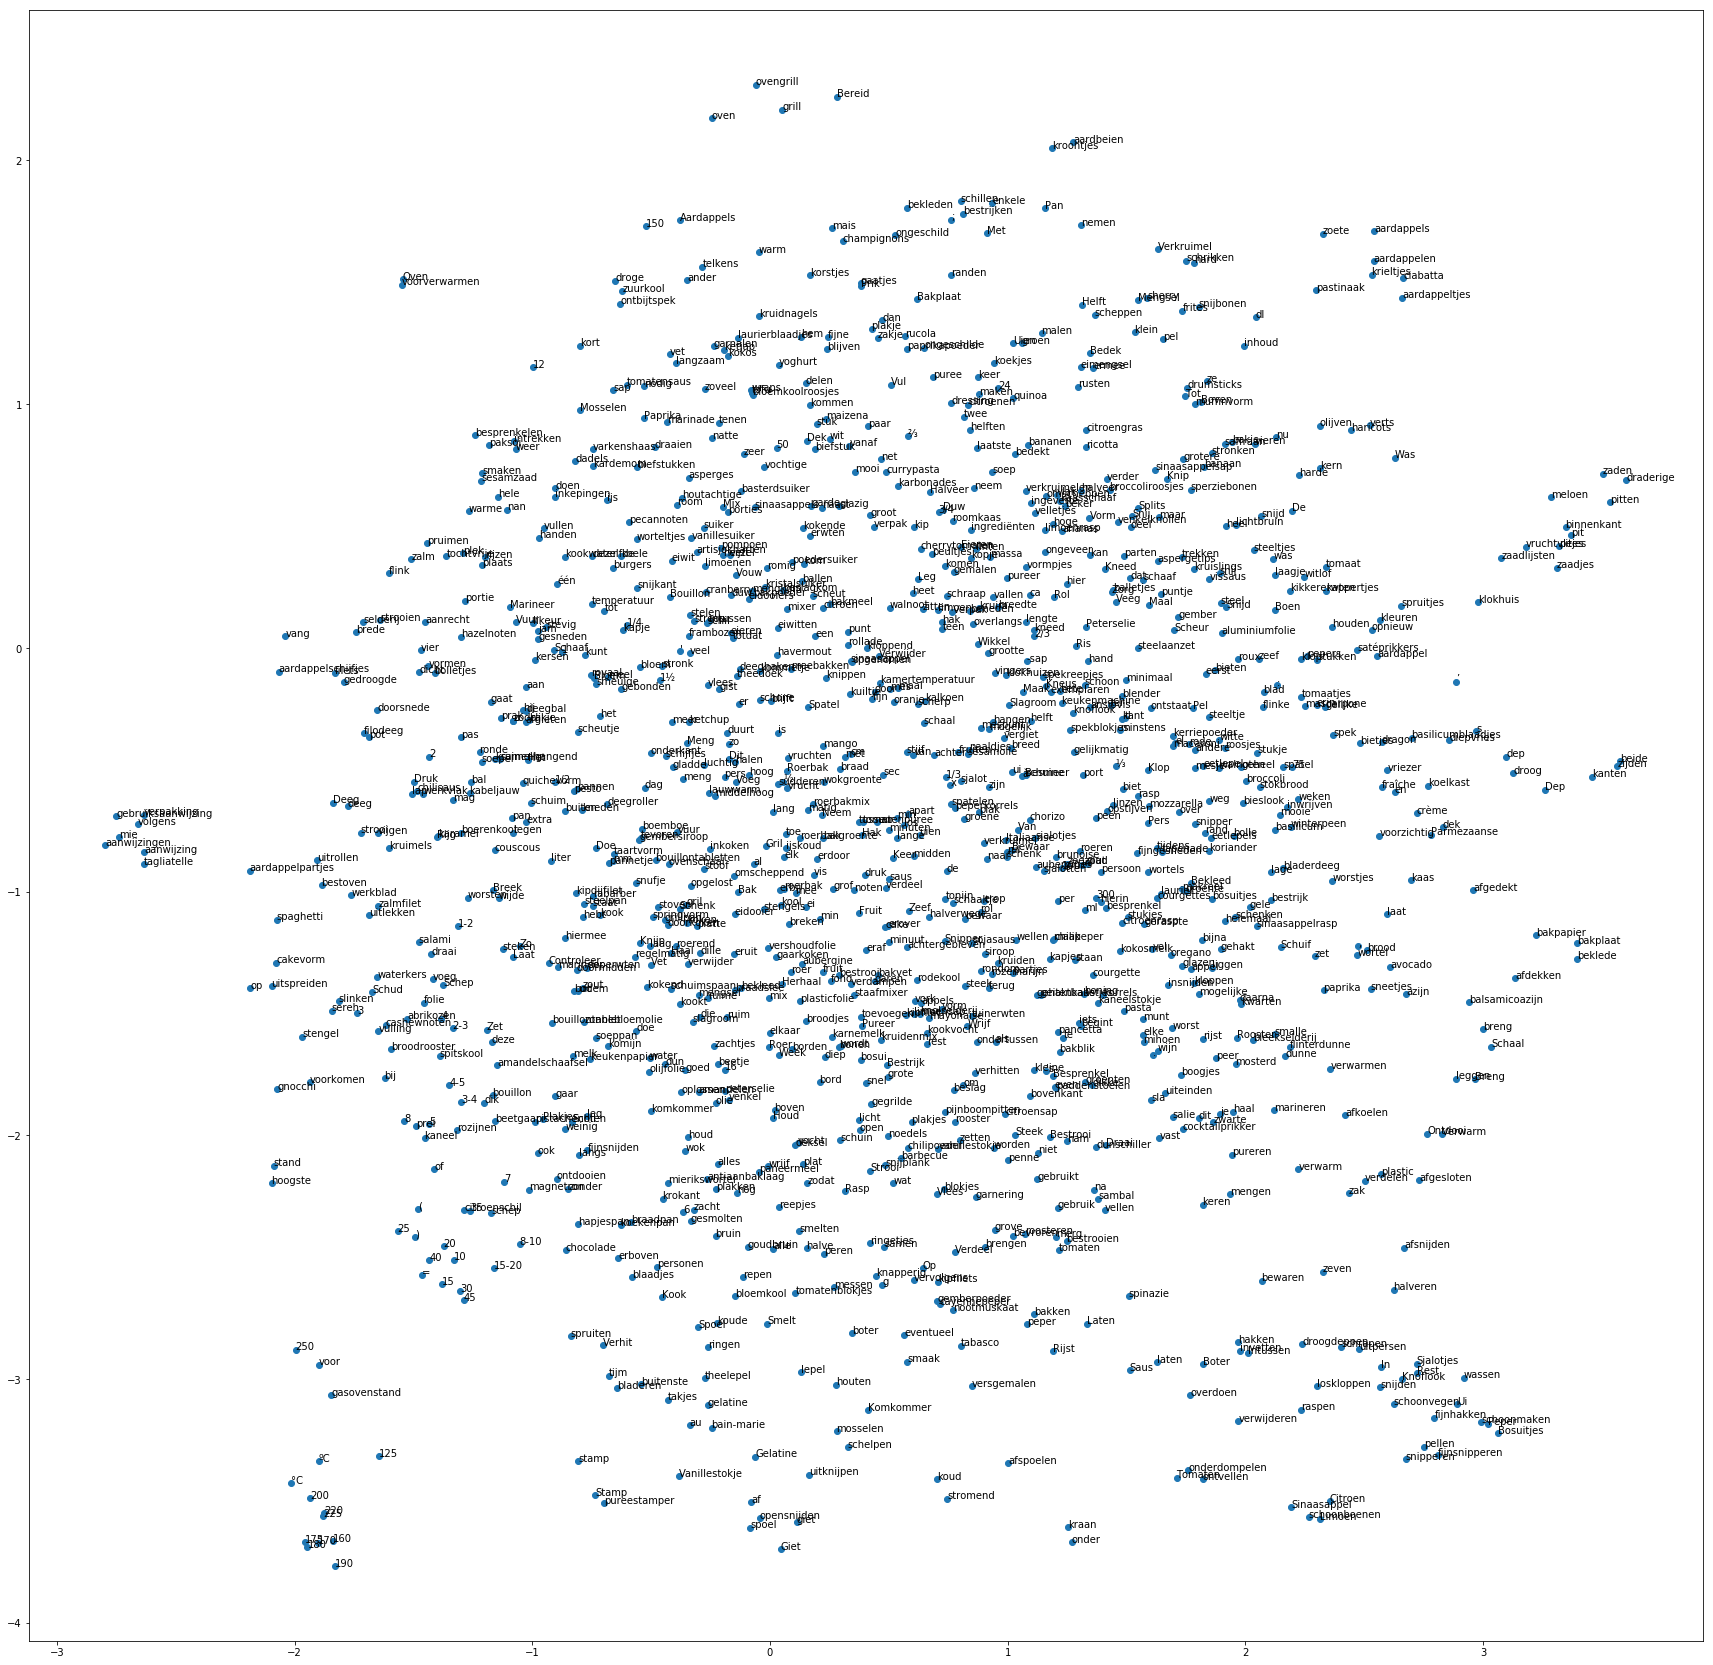

In [15]:
fig = plt.figure(figsize=(30,30))

ax = fig.add_subplot(1, 1, 1)


ax.scatter(df_word2vec['x'], df_word2vec['y'])
for word, pos in df_word2vec.iterrows():
    ax.annotate(word, pos)
fig.savefig('test.png')

In [16]:
from collections import Counter
import numpy as np
import nltk
import re
import sklearn.manifold
import multiprocessing
import pandas as pd
import gensim.models.word2vec as w2v

In [17]:
descriptions = df['description'].astype(str) + df['recipe_instruction'].astype(str)


In [18]:
#corpus = np.array(df.tags.astype(str))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#model = gensim.models.Word2Vec(TOKENIZED_CORPUS, size=10, window=3, sg=0,
                               #min_count=5, sample=1e-3, iter=10)

In [19]:
TOKENIZED_CORPUS = [nltk.word_tokenize(sentence)
                    for sentence in corpus]

In [20]:
tokenizer = nltk.data.load('tokenizers/punkt/dutch.pickle')

## NEWSPAPER RECIPES

In [21]:
df = pd.read_pickle('recipe_dataset.pkl')

In [67]:
df_nrc = pd.read_csv('nrc_recipes_clean2.csv')
df_vk = pd.read_csv('vk_recipes2.csv')
df_trouw = pd.read_csv('trouw_recipes_3.csv')
df_parool = pd.read_csv('parool_recipes2.csv')


df = pd.concat([df_nrc, df_vk, df_trouw, df_parool])

In [22]:
df

,date,ocr,ocr_url,page,title,type,ocr_without_stopwords
0,1957-07-25 00:00:00,Handboek Voor grootmeesters en kzukznprinsesje...,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,9,volkskrant,articles,Handboek Voor grootmeesters en kzukznprinsesje...
1,1957-07-25 00:00:00,SNELLER KOKEN OOK de prisma-serie van het Spec...,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,9,volkskrant,articles,SNELLER OOK de prisma-serie van het Spectrum i...
2,1957-08-01 00:00:00,"NIEUW SOORT SOUVENIR EEN nieuw soort souvenir,...",http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,7,volkskrant,articles,"NIEUW SOORT SOUVENIR EEN nieuw soort souvenir,..."
3,1957-08-30 00:00:00,TEGELS VERSCHOTEN van KLEUR EN WERDEN 3 EEUWEN...,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,3,volkskrant,articles,TEGELS VERSCHOTEN van KLEUR EN WERDEN 3 EEUWEN...
4,1957-08-29 00:00:00,NA PREEK VOOR VREEMDE PAROCHIE Ridders van San...,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,5,volkskrant,articles,NA PREEK VOOR VREEMDE PAROCHIE Ridders van San...
5,1957-08-23 00:00:00,FRANSE OMZETBELASTING OP UITVINDINGEN DEN HAAG...,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,2,volkskrant,articles,FRANSE OMZETBELASTING OP UITVINDINGEN DEN HAAG...
6,1957-08-27 00:00:00,Activiteit IN de kampongs en de dorpen bestaat...,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,5,volkskrant,articles,Activiteit IN de kampongs en de dorpen bestaat...
7,1957-03-09 00:00:00,BOTWINNIKS UITDAGING AAN SMISLOF: „Speel Rouze...,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,17,volkskrant,articles,BOTWINNIKS UITDAGING AAN SMISLOF: „Speel Rouze...
8,1957-01-22 00:00:00,Poging om morfine te verbergen Vernietigende g...,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,7,volkskrant,articles,Poging om morfine te verbergen Vernietigende g...
9,1957-05-01 00:00:00,Warem gromperen zallot (Luxemburgse aardappels...,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,5,volkskrant,articles,Warem gromperen zallot (Luxemburgse aardappels...


In [23]:
## clean ocr
## Expand this 

df['ocr_clean'] = df['ocr'].str.findall('\w{3,}').str.join(' ')
df['ocr_clean'] = df['ocr_clean'].str.lower()

In [33]:
df['ocr_clean']

0       handboek voor grootmeesters kzukznprinsesjes k...
1       sneller koken ook prisma serie van het spectru...
2       nieuw soort souvenir een nieuw soort souvenir ...
3       tegels verschoten van kleur werden eeuwen oude...
4       preek voor vreemde parochie ridders van santia...
5       franse omzetbelasting uitvindingen den haag au...
6       activiteit kampongs dorpen bestaat het leven v...
7       botwinniks uitdaging aan smislof speel rouzer ...
8       poging morfine verbergen vernietigende getuige...
9       warem gromperen zallot luxemburgse aardappels ...
10      super keuken tae keuken van toekomst een gewik...
11      recept voornaamste onderdeel van het kunstwerk...
12      pronkstuk atoom expositie voorlopig zal nochta...
13      eenden moes canard presse edel frans maar komt...
14      keukengeheimen ontraadseld jirle bekruipt niet...
15      nieuw recept voor nylons komt een einde aan la...
16      martine wittop koning leerde voedzaam smakelij...
17      van sm

In [24]:
corpus = np.array(df['ocr_clean'].astype(str))

In [25]:
TOKENIZED_CORPUS = [nltk.word_tokenize(sentence)
                    for sentence in corpus]

In [74]:
model = gensim.models.Word2Vec(TOKENIZED_CORPUS, size=200, window=5, sg=1,
                               min_count=100, sample=1e-3, iter=100)

2018-03-08 12:35:37,642 : INFO : collecting all words and their counts
2018-03-08 12:35:37,643 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-03-08 12:35:37,914 : INFO : collected 80779 word types from a corpus of 1150624 raw words and 4131 sentences
2018-03-08 12:35:37,915 : INFO : Loading a fresh vocabulary
2018-03-08 12:35:37,974 : INFO : min_count=100 retains 1391 unique words (1% of original 80779, drops 79388)
2018-03-08 12:35:37,975 : INFO : min_count=100 leaves 835325 word corpus (72% of original 1150624, drops 315299)
2018-03-08 12:35:37,980 : INFO : deleting the raw counts dictionary of 80779 items
2018-03-08 12:35:37,983 : INFO : sample=0.001 downsamples 50 most-common words
2018-03-08 12:35:37,984 : INFO : downsampling leaves estimated 640931 word corpus (76.7% of prior 835325)
2018-03-08 12:35:37,985 : INFO : estimated required memory for 1391 words and 200 dimensions: 2921100 bytes
2018-03-08 12:35:37,990 : INFO : resetting layer weights
2

In [27]:
model.most_similar(['bloemkool'])

/Users/melvinwevers/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('roosjes', 0.41599544882774353),
 ('macaroni', 0.3081870973110199),
 ('broccoli', 0.28428733348846436),
 ('haricots', 0.2698356807231903),
 ('aardappel', 0.2672126293182373),
 ('aardappelpartjes', 0.2663777470588684),
 ('erwten', 0.25778067111968994),
 ('spruiten', 0.25159794092178345),
 ('bloemkoolroosjes', 0.2511718273162842),
 ('tagliatelle', 0.24890877306461334)]

In [28]:
vocab = list(model.wv.vocab)
X = model[vocab]

/Users/melvinwevers/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [29]:
import umap
data = umap.UMAP(n_neighbors=10,
                      min_dist=.5,
                      metric='cosine').fit_transform(X)

In [30]:
df_word2vec = pd.DataFrame(data, index=vocab, columns=['x', 'y'])

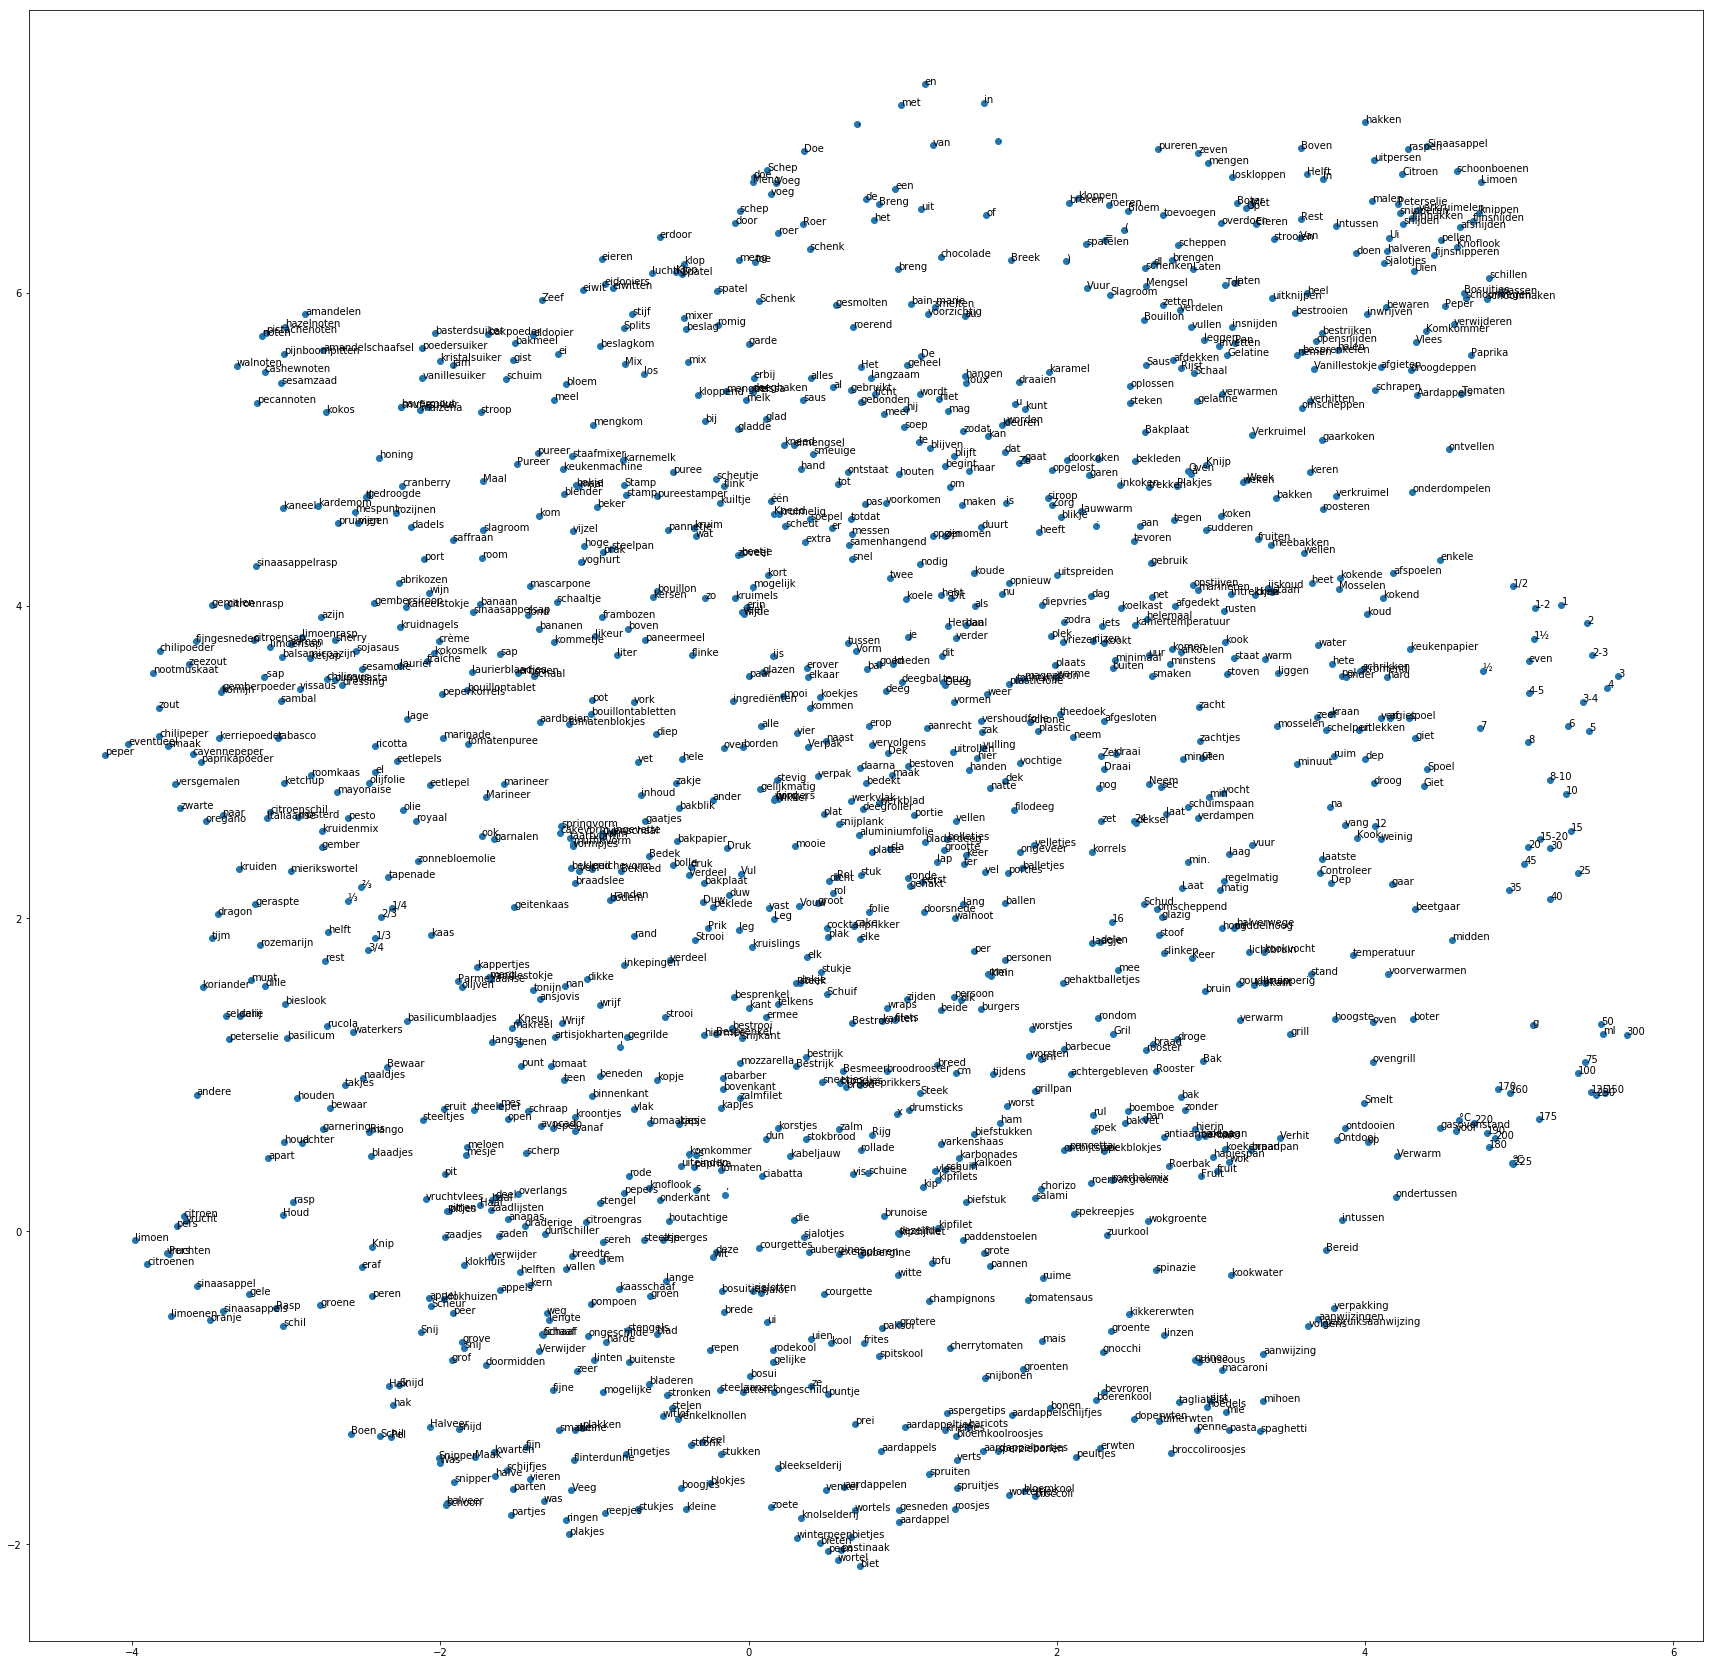

In [37]:
fig = plt.figure(figsize=(30,30))

ax = fig.add_subplot(1, 1, 1)


ax.scatter(df_word2vec['x'], df_word2vec['y'])
#ax.set_xlim([-4, 5])
#ax.set_ylim([-8, 4])
for word, pos in df_word2vec.iterrows():
    ax.annotate(word, pos)
fig.savefig('word2vec.svg')